# Soft Matter Project

### Inserting necessary libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

### Defining essential constants

In [2]:
n = np.array([10,50,100,250,500,750,1000])
b = 3.0
T = 5000
N = 100

### Reading the files

In [3]:
Rg=np.loadtxt('gyration_radius_b=%.1f_N=%d_T=%d.dat'%(b,N,T)) #Radius
Q=np.loadtxt('end-to-end_distance_b=%.1f_N=%d_T=%d.dat'%(b,N,T)) #Distance

In [4]:
print(Rg[:,1])
print(Q[:,1])

[12.075897 14.910882 12.75362  ... 14.556148  9.25949  14.141389]
[28.637453 44.58406  20.949572 ... 42.422472 18.412337 32.126421]


### Plot

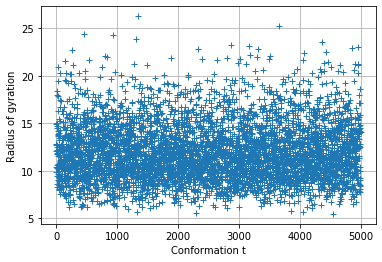

In [5]:
x = np.arange(5000)
plt.plot(Rg[:,0],Rg[:,1],linestyle = 'none', marker = '+')
plt.xlabel('Conformation t')
plt.ylabel('Radius of gyration')
plt.grid()

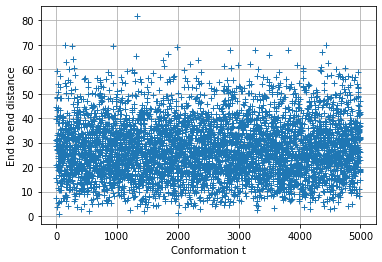

In [6]:
plt.plot(Q[:,0],Q[:,1],linestyle = 'none', marker = '+')
plt.xlabel('Conformation t')
plt.ylabel('End to end distance')
plt.grid()

### Calculation of the mean squared value for the end to end distance and gyration radius

In [7]:
Rg_2 = Rg*Rg
np.mean(Rg_2[:,1])

151.33817432155445

In [8]:
Q_2 = Q*Q
np.mean(Q_2[:,1])

890.6910519260119

In [9]:
R_mean_square = np.zeros(len(n))
Q_mean_square = np.zeros(len(n))
for i in range(len(n)):
    N = n[i]
    R = np.loadtxt('gyration_radius_b=%.1f_N=%d_T=%d.dat'%(b,N,T), unpack ='True')[1]
    Q = np.loadtxt('end-to-end_distance_b=%.1f_N=%d_T=%d.dat'%(b,N,T), unpack ='True')[1]
    R_mean_square[i] = np.mean(R**2)
    Q_mean_square[i] = np.mean(Q**2)

### Plot

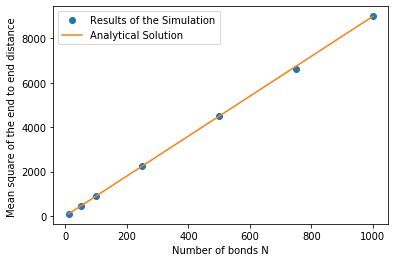

In [10]:
plt.plot(n,Q_mean_square,'o', label = f"Results of the Simulation")
plt.plot(n, n*b**2, label = f"Analytical Solution")
plt.xlabel('Number of bonds N')
plt.ylabel('Mean square of the end to end distance ')
plt.legend()
plt.show()

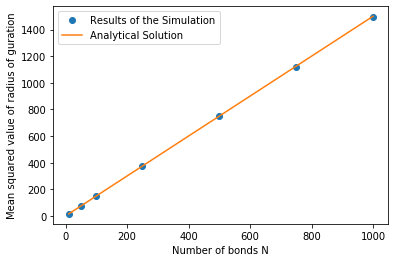

In [11]:
plt.plot(n,R_mean_square,'o', label = f"Results of the Simulation")
plt.plot(n, n*b**2/6, label = f"Analytical Solution")
plt.xlabel('Number of bonds N')
plt.ylabel('Mean squared value of radius of guration')
plt.legend()
plt.show()

## Probability distribution for N=2

### Defining the essential variables

In [12]:
N=2
points = 100
P = np.zeros(points-1)

### Reading the file

In [13]:
f2='end-to-end_distance_b=%.1f_N=%d_T=%d.dat'%(b,N,T)
Q2 = np.loadtxt(f2,unpack = True)[1]

### Finding the minimum and maximum values for Q and normalizing

In [14]:
Q_min = min(Q2)
Q_max = max(Q2)
step = (Q_max - Q_min)/points
Q_p = np.arange(Q_min,Q_max,(Q_max - Q_min) / points)
l = len(Q_p)-1

In [15]:
for i in range(l):
    for Q_j in Q2:
        if (Q_j >= Q_p[i]) and (Q_j < Q_p[i+1]):
            P[i]+= 1
P = P/T/step

### Plot

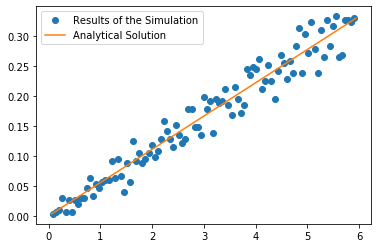

In [16]:
plt.plot(Q_p[:-1] + step/2,P, 'o', label = f"Results of the Simulation")
plt.plot(Q_p,Q_p/(2*b**2), label = f"Analytical Solution")
plt.legend()
plt.show()

## Probability distribution for N = 100

### Defining the essential variables

In [17]:
N=100
f3='end-to-end_distance_b=%.1f_N=%d_T=%d.dat'%(b,N,T)
Q100 = np.loadtxt(f3,unpack = True)[1]

### Finding the minimum and maximum values for Q and normalizing

In [18]:
Q_min = min(Q100)
Q_max = max(Q100)
Q_p = np.arange(Q_min,Q_max,(Q_max - Q_min)/points)
P = np.zeros(points-1)
for i in range(len(Q_p)-1):
    for Q_j in Q100:
        if (Q_j>=Q_p[i]) and (Q_j<Q_p[i+1]):
            P[i]+=1
P = P/T/((Q_max - Q_min)/points)

### Calculation of the analytical solution

In [19]:
def Phi(q):
    return 4*np.pi*q*q*(3/(2*np.pi*N*b*b))**(3/2)*np.exp(-(3*q*q)/(2*N*b*b))
Q_analytical = Phi(Q_p)

### Plot

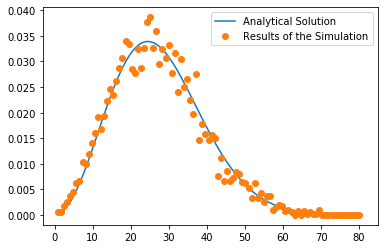

In [20]:
plt.plot(Q_p,Q_analytical, label = f"Analytical Solution")
plt.plot(Q_p[:-1], P, 'o', label = f"Results of the Simulation")
plt.legend()
plt.show()